In [2]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('Tractor-Sales.csv')
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


# pre-processing

In [5]:
dates = pd.date_range(start ='2003-01-01', periods = len(df), freq = 'MS')

In [6]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [7]:
df['month']=dates.month

In [8]:
df['year']= dates.year

In [9]:
df

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
...,...,...,...,...
139,Aug-14,848,8,2014
140,Sep-14,640,9,2014
141,Oct-14,581,10,2014
142,Nov-14,519,11,2014


In [10]:
df.rename(columns = {'Number of Tractor Sold':'tractorsales'}, inplace = True)
df

,Month-Year,tractorsales,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
...,...,...,...,...
139,Aug-14,848,8,2014
140,Sep-14,640,9,2014
141,Oct-14,581,10,2014
142,Nov-14,519,11,2014


In [11]:
df.set_index(dates,inplace = True)

In [12]:
df

,Month-Year,tractorsales,month,year
2003-01-01,Jan-03,141,1,2003
2003-02-01,Feb-03,157,2,2003
2003-03-01,Mar-03,185,3,2003
2003-04-01,Apr-03,199,4,2003
2003-05-01,May-03,203,5,2003
...,...,...,...,...
2014-08-01,Aug-14,848,8,2014
2014-09-01,Sep-14,640,9,2014
2014-10-01,Oct-14,581,10,2014
2014-11-01,Nov-14,519,11,2014


In [13]:
df= df[["tractorsales","month","year"]]
df

,tractorsales,month,year
2003-01-01,141,1,2003
2003-02-01,157,2,2003
2003-03-01,185,3,2003
2003-04-01,199,4,2003
2003-05-01,203,5,2003
...,...,...,...
2014-08-01,848,8,2014
2014-09-01,640,9,2014
2014-10-01,581,10,2014
2014-11-01,519,11,2014


In [14]:
import calendar
df['month'] = df['month'].apply(lambda x : calendar.month_abbr[x])
df

C:\Users\hp\AppData\Local\Temp\ipykernel_31528\4152346754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].apply(lambda x : calendar.month_abbr[x])


,tractorsales,month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003
...,...,...,...
2014-08-01,848,Aug,2014
2014-09-01,640,Sep,2014
2014-10-01,581,Oct,2014
2014-11-01,519,Nov,2014


<Axes: >

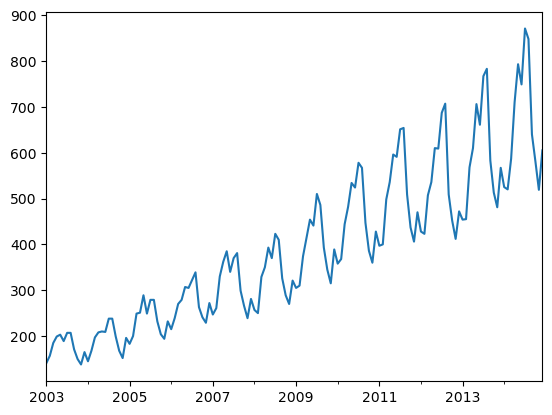

In [15]:
tsales = df['tractorsales']
tsales.plot()

## decompose

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(tsales)

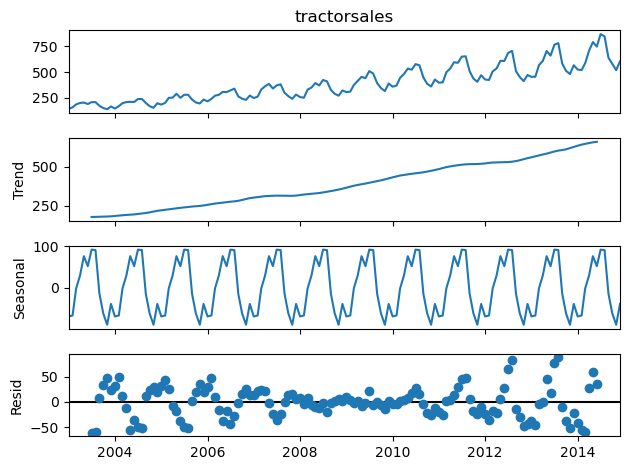

In [17]:
decompose.plot();

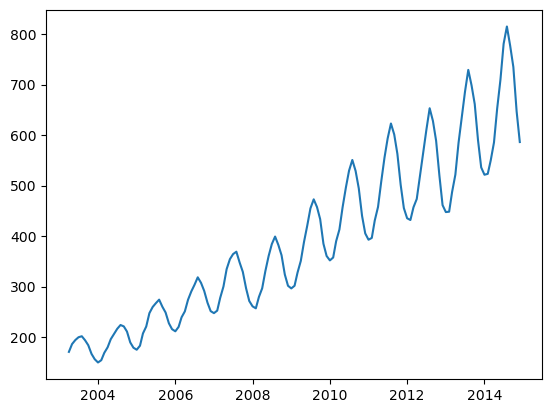

In [18]:
#simple moving average
#rolling stats
plt.plot(tsales.rolling(window=4).mean())

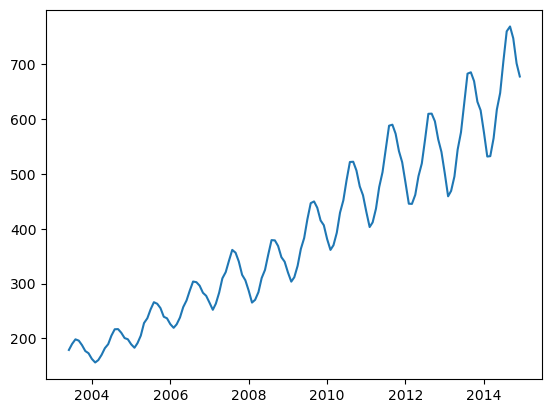

In [19]:
plt.plot(tsales.rolling(window=6).mean())

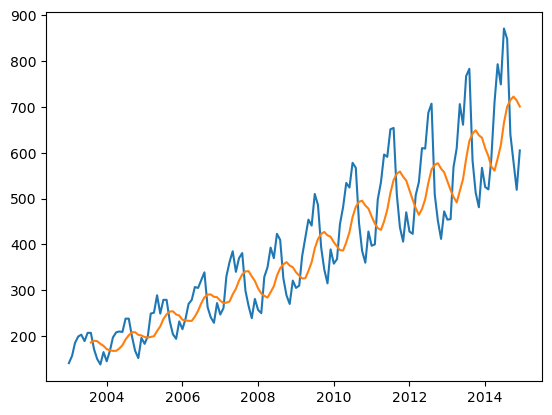

In [20]:
plt.plot(tsales)
plt.plot(tsales.rolling(window=8).mean())

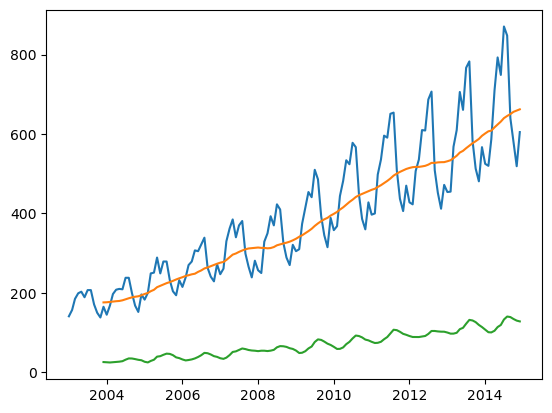

In [21]:
plt.plot(tsales)
plt.plot(tsales.rolling(window=12).mean())
plt.plot(tsales.rolling(window=12).std())

basically data is smoothening by choosing more number of windows


Text(0.5, 1.0, 'standard deviation with window size 12')

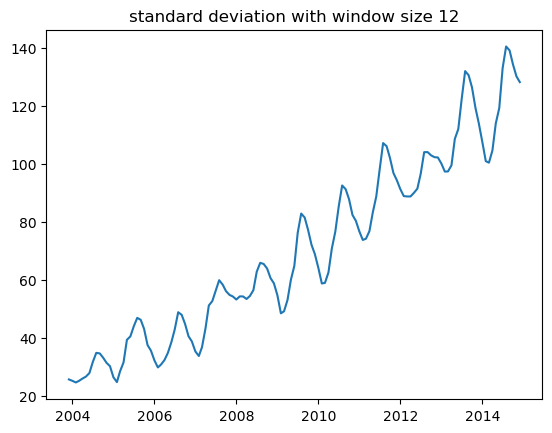

In [22]:
plt.plot(tsales.rolling(window=12).std())
plt.title('standard deviation with window size 12')

In [23]:
updatedf = pd.pivot(df, values = 'tractorsales', index = 'month', columns = 'year')
updatedf

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [24]:
pd.pivot(df, values = 'tractorsales', index = 'year', columns = 'month')

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299
2008,350,410,321,250,257,423,370,329,393,270,289,326
2009,414,486,389,310,305,510,441,374,454,315,345,393
2010,482,567,428,368,358,578,524,444,534,360,386,447
2011,536,654,470,400,397,651,591,498,596,406,437,509


<Axes: xlabel='month'>

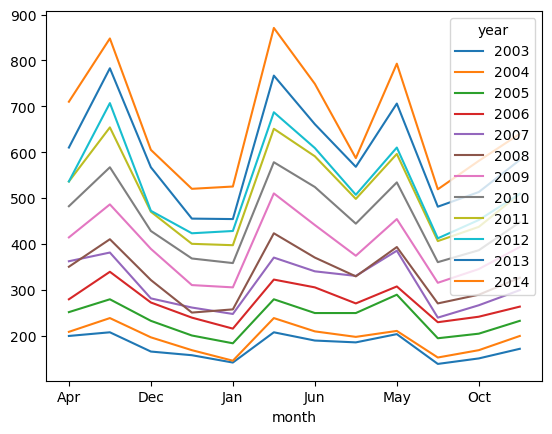

In [25]:
updateddf = updatedf.reindex(index = ['Jan','Feb','Mar','Apr','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
updatedf.plot()

<Axes: xlabel='year'>

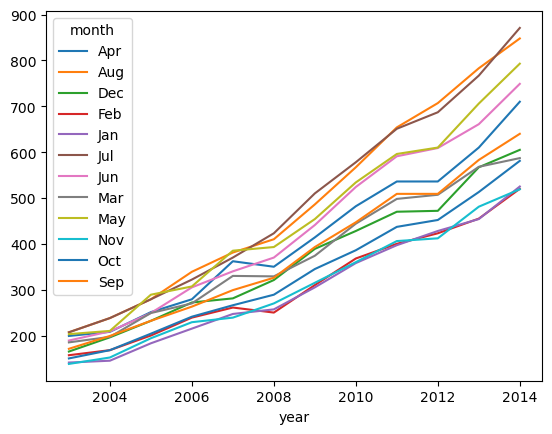

In [26]:
pd.pivot(df, values = 'tractorsales', index = 'year', columns = 'month').plot()

<Axes: >

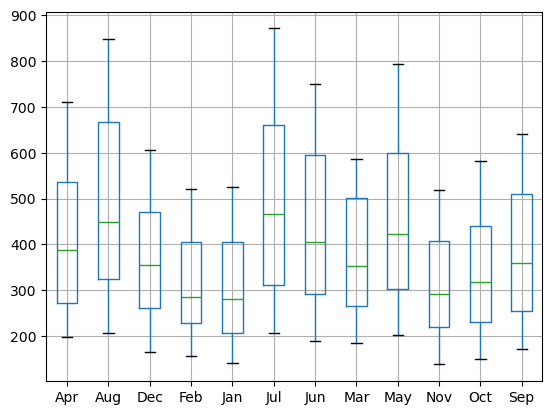

In [27]:
pd.pivot(df, values = 'tractorsales', index = 'year', columns = 'month').boxplot()

In [28]:
df.head()

,tractorsales,month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [29]:
tsales = df['tractorsales']
tsales

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: tractorsales, Length: 144, dtype: int64

In [30]:
import seaborn as sns
import plotly.express as px

C:\Users\hp\AppData\Local\Temp\ipykernel_31528\2979012033.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tsales)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tractorsales', ylabel='Density'>

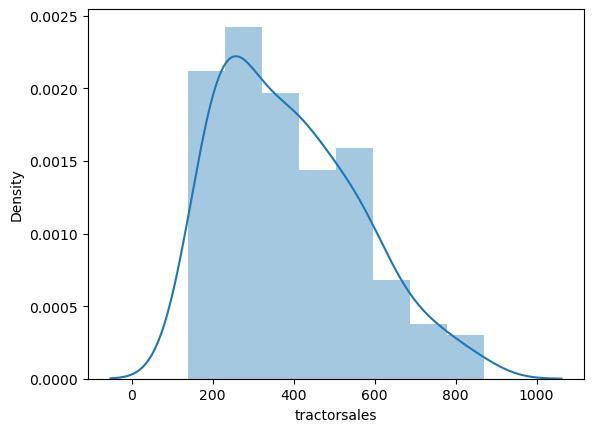

In [31]:
sns.distplot(tsales)

In [32]:
from statsmodels.tsa.stattools import adfuller
adfuller(tsales)

(1.1088250591467355,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

if p value(2nd result in adfuler test) is less than 5% then it is stationary data. otherwise it is non stationary data.

therfore our data is 99%. thereore it is not a stationary data.

the 1%
5%
10% 
is the confidence interval

In [33]:
#function to check whether data is stationary
def test_stationary(timeseries):
    rollmean = timeseries.rolling(12).mean()
    rollstd = timeseries.rolling(12).std()
    plt.figure(figsize = (18,10))
    plt.grid('both')
    plt.plot(timeseries)
    plt.plot(rollmean, label = 'mean')
    plt.plot(rollstd, label = 'standard deviation')
    plt.legend()
    print('-----------------------')
    print('augmented dicky fuller test')
    print(adfuller(timeseries))
    print('------------------------')
    
    

-----------------------
augmented dicky fuller test
(1.1088250591467355, 0.9952912415248419, 14, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 1082.5357724796872)
------------------------


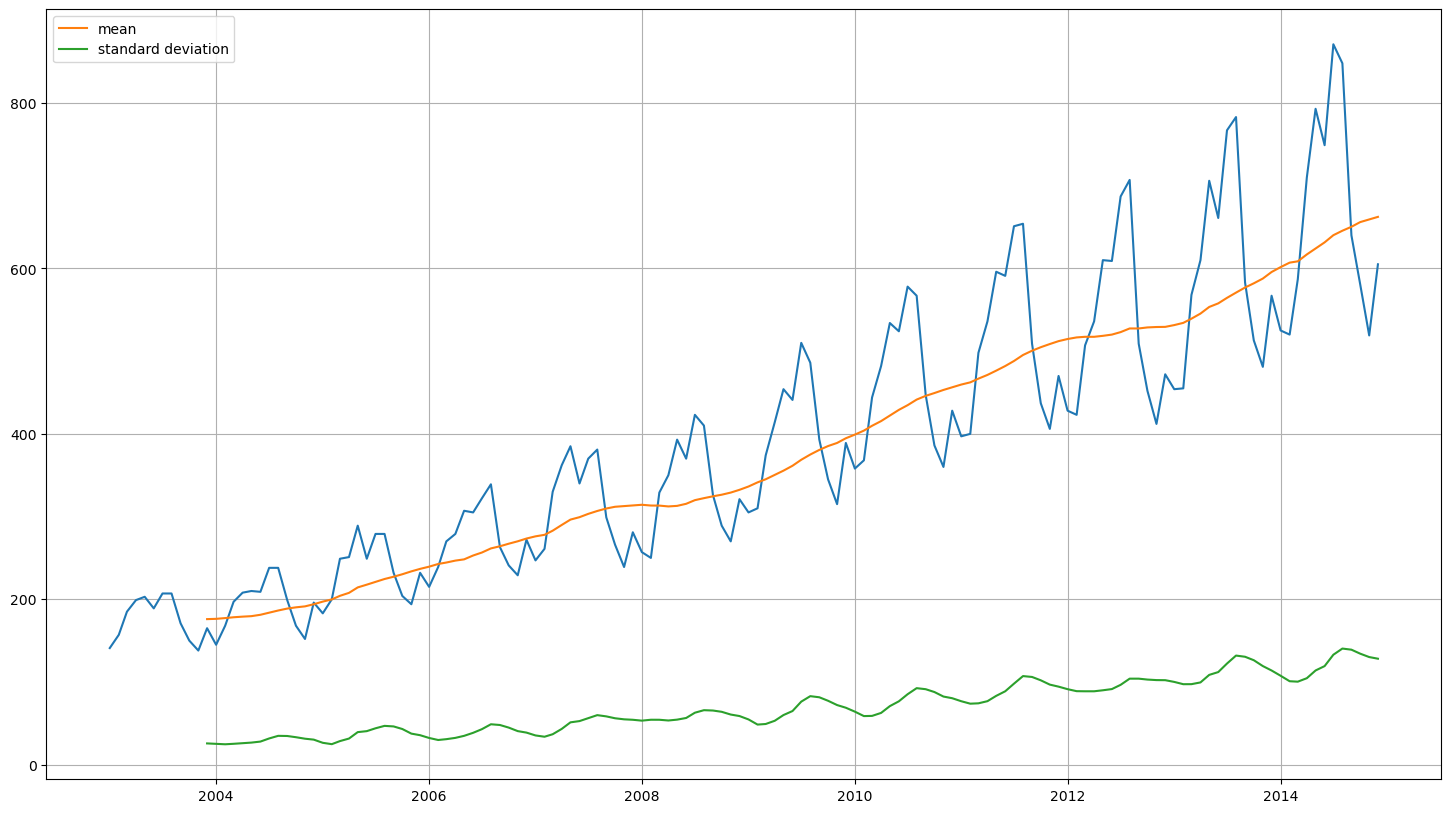

In [34]:
test_stationary(tsales)

## making data stationary

-----------------------
augmented dicky fuller test
(-2.5434807731959954, 0.10525012618274077, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, 1067.8217204928187)
------------------------


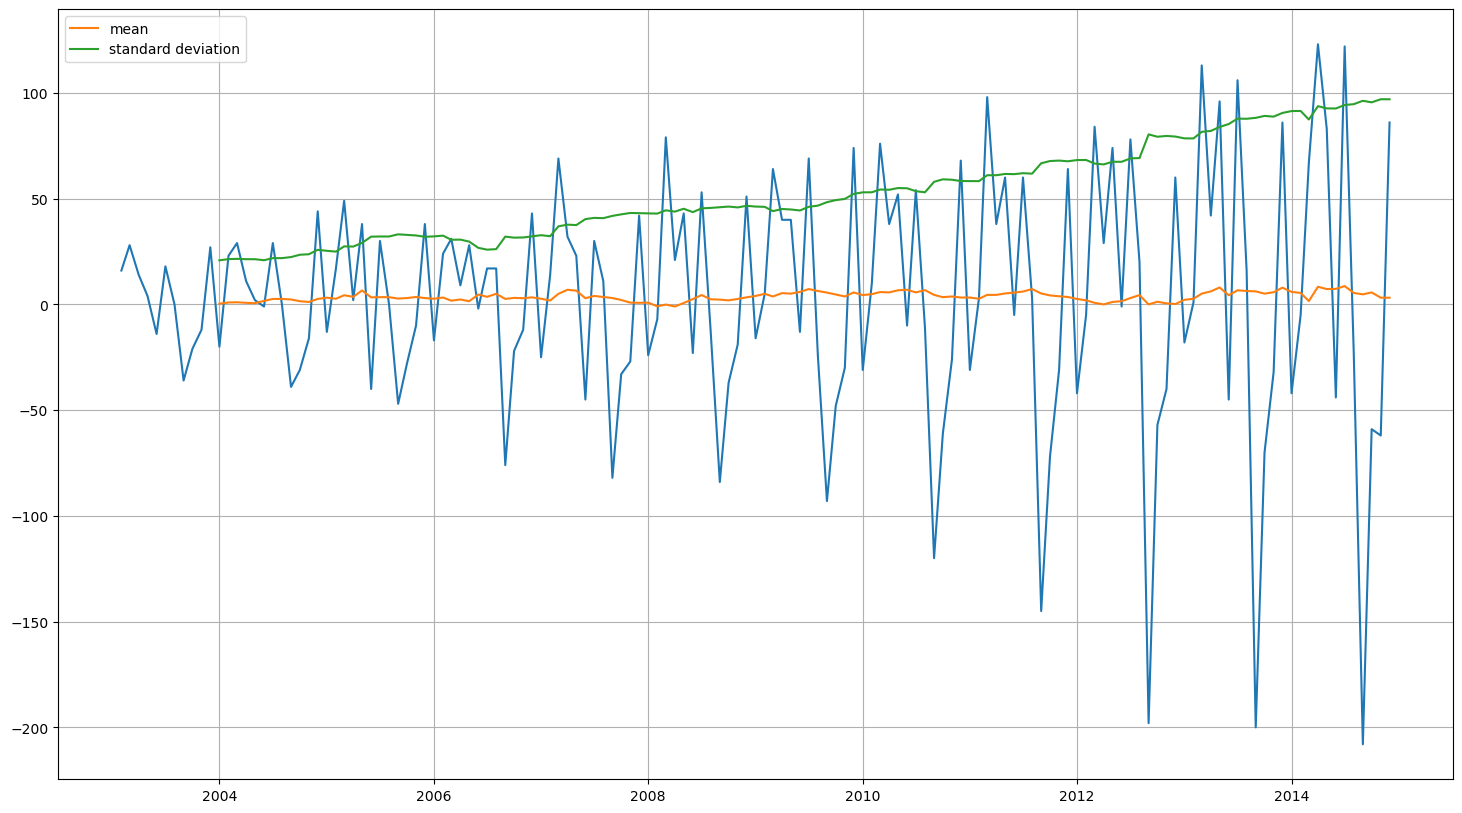

In [35]:
#differencing
firstdiff = tsales.diff(periods=1)
firstdiff.dropna(inplace= True)
test_stationary(firstdiff)

therefore using differencing we have made our data somewhat stationary

In [36]:
import numpy as np
logdiff = np.log(tsales).diff(periods = 1).dropna()
#log transformation

-----------------------
augmented dicky fuller test
(-2.6804671199965546, 0.07747972836509262, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, -441.8932659968409)
------------------------


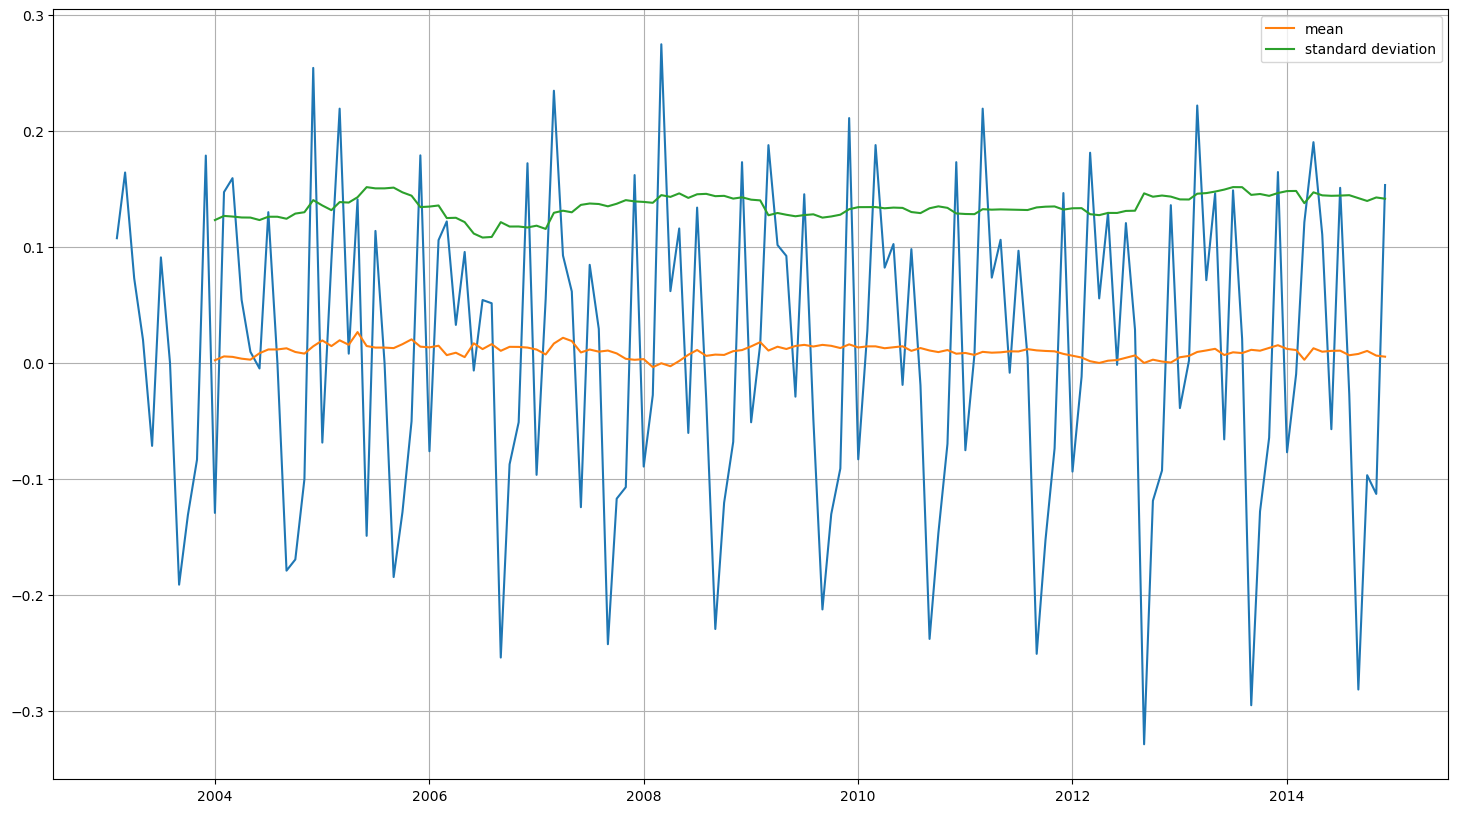

In [37]:
test_stationary(logdiff)

since p value is still reater than 0.07, therefore data is still not fully stationary
now checking with periods = 2

-----------------------
augmented dicky fuller test
(-3.2007215662324136, 0.019942950105460676, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -434.9038941451596)
------------------------


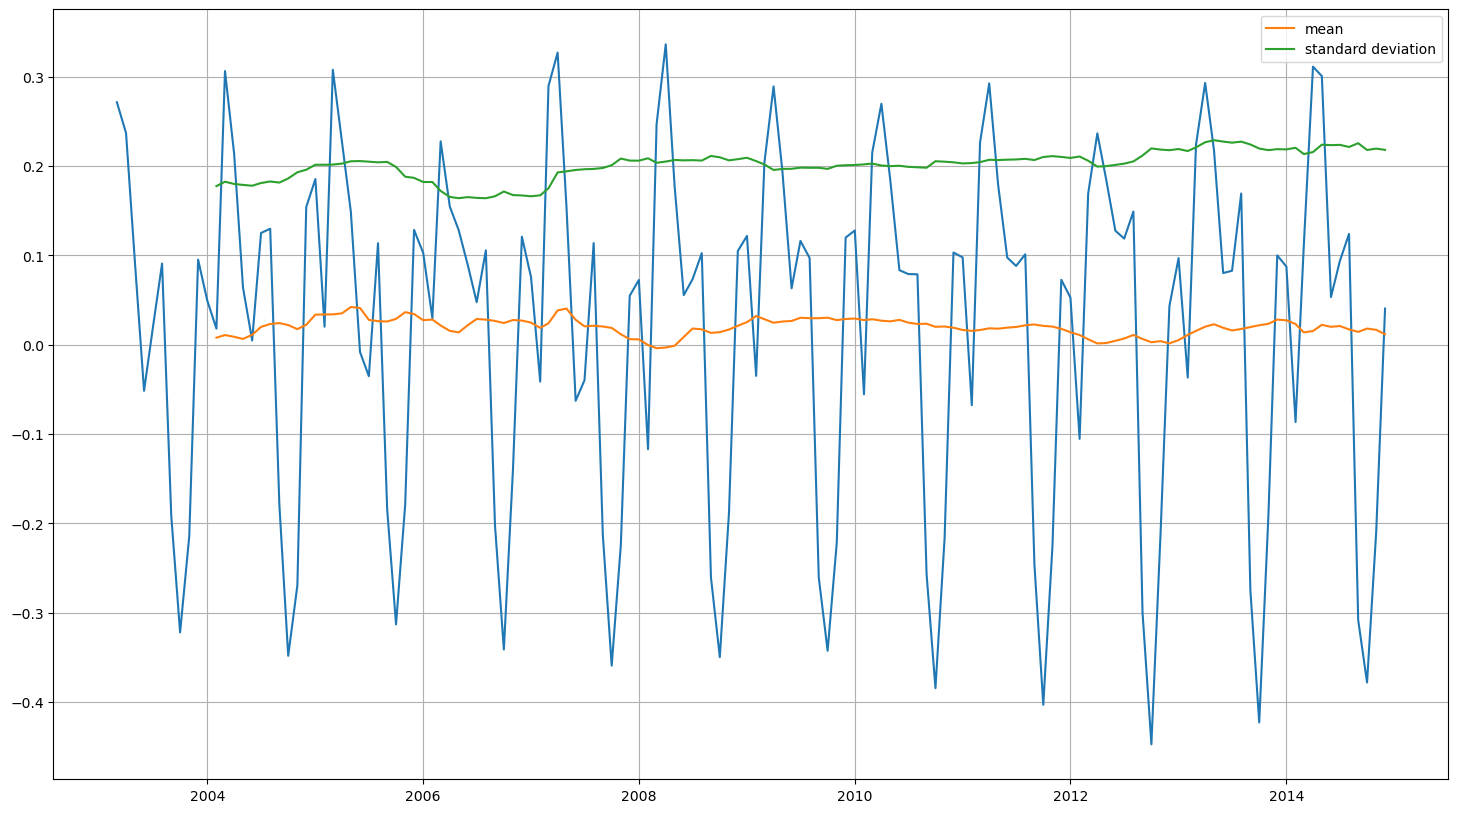

In [38]:
logdiff2 = np.log(tsales).diff(periods = 2).dropna()
test_stationary(logdiff2)

now, p value = 0.01
therefore my data is stationary now

# ARIMA SARIMA
# PACF ACF
# MSE 
# out of box forecasting

In [39]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

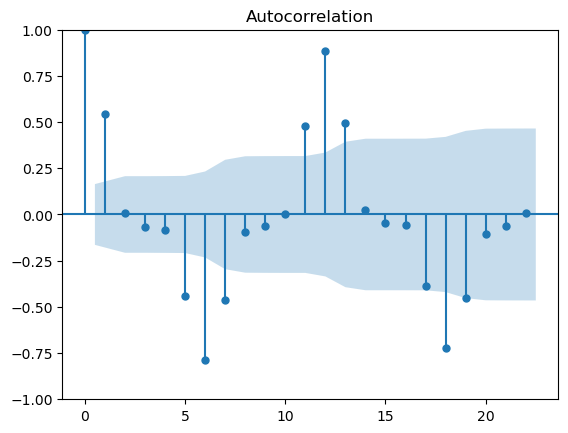

In [40]:
#pacf and acf 
smt.graphics.plot_acf(logdiff2);

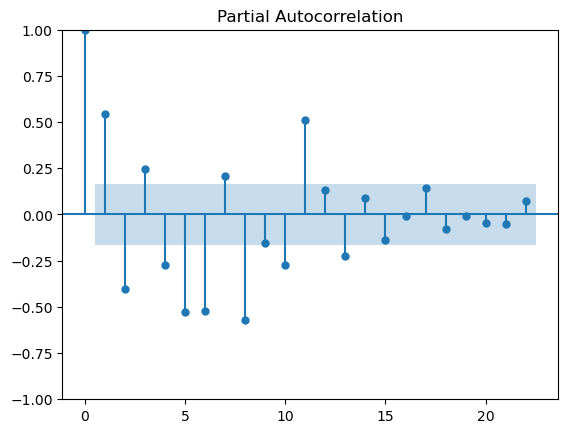

In [41]:
smt.graphics.plot_pacf(logdiff2);

In [73]:
from statsmodels.tsa.arima.model import ARIMA

In [49]:
#mse 
np.sqrt(meansqaurederror(y, prediction))

NameError: name 'meansqaurederror' is not defined

p,d,q
p = auto regression
d = differencing
q = moving average

In [48]:
def arima_model(x,y,arima_order):
    history = [i for i in x]
    prediction = list()
    for i in range(len(y)):
        #building model 
        model = ARIMA(data, order= ())
        model.fit()
        yhat = model.forecast()[0]
        prediction.append(yhat)
        history.append(y[t])
    mse = np.sqrt(meansquarederror(y, prediction))
    return mse

In [59]:
def evaluate_arima_model(p_value, d_value, q_value):
    for i in p_value:
        for j in d_value:
            for k in q_value:
                order = (i,j,k)
                #hyperparameter tuning
                
                try:
                    rmse = arima_model(df, test, order)
                    if rmse < best_score:
                       best_score, best_cfg = rmse, order
                       print(rmse, order)
                except:
                    continue

In [60]:
p_value = range(0,2)
d_value = range(0,2)
q_value = range(0,2)

In [61]:
evaluate_arima_model(p_value,d_value,q_value)

we have generated hypter parameters p d and q

In [64]:
len(tsales)
#12 months 
#taking lasst 2 year data as test data 

144

In [65]:
evaluate_arima_model(train_data, test_data, p_value, d_value, q_value )

NameError: name 'train_data' is not defined

In [86]:
train_data = logdiff2[:120]
test_data = logdiff2[120:]
data = [i for i in train_data]

model = ARIMA(data, order =(2,0,2))
mfit = model.fit()
# model.forecast()


C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
predict = mfit.forecast()
print(predict)

[0.08883456]


In [88]:
mfit.bic()

TypeError: 'numpy.float64' object is not callable